In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
youtube = pd.read_csv('/Users/muhammadramzy/Documents/PWDK/USvideos.csv')

In [4]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


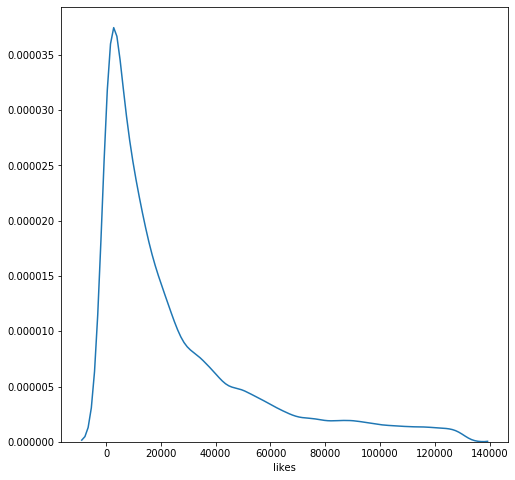

In [6]:
#Filtering the data based on the outlier of the likes column
Q1_like = youtube['likes'].describe()['25%']
Q3_like = youtube['likes'].describe()['75%']
IQR = Q3_like - Q1_like

plt.figure(figsize = (8,8))
sns.distplot(youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'], hist = False)

out_like = youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'].index

In [7]:
#Change to datetime. Figure out how to get the day difference

In [8]:
#Tweak the data so it could be converted into datetime
youtube['trending_date'] = youtube['trending_date'].apply(lambda x: '{}.{}.{}'.format(x[3:5],x[6:],x[0:2]))
youtube['publish_time'] = youtube['publish_time'].apply(lambda x: x[:10])

In [9]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'])
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])

In [10]:
pd.to_datetime(youtube['trending_date'])

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
40947   2018-06-14
40948   2018-06-14
Name: trending_date, Length: 40949, dtype: datetime64[ns]

In [11]:
pd.to_datetime(youtube['publish_time'])

0       2017-11-13
1       2017-11-13
2       2017-11-12
3       2017-11-13
4       2017-11-12
           ...    
40944   2018-05-18
40945   2018-05-18
40946   2018-05-18
40947   2018-05-17
40948   2018-05-17
Name: publish_time, Length: 40949, dtype: datetime64[ns]

In [12]:
(youtube['trending_date'] - youtube['publish_time'])

0        1 days
1        1 days
2        2 days
3        1 days
4        2 days
          ...  
40944   27 days
40945   27 days
40946   27 days
40947   28 days
40948   28 days
Length: 40949, dtype: timedelta64[ns]

In [13]:
#Create a new column called Trending Gap which is a days difference between the Trending Date and the Publishing Time
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']
youtube['trending_gap'] = youtube['trending_gap'].apply(lambda x: x.days) 

In [14]:
youtube['trending_gap']

0         1
1         1
2         2
3         1
4         2
         ..
40944    27
40945    27
40946    27
40947    28
40948    28
Name: trending_gap, Length: 40949, dtype: int64

In [15]:
#Here I create new column for the total character from the title and the description
youtube['title_total_word'] = youtube['title'].apply(lambda x: len(x))
youtube['description_total_word'] = youtube['description'].apply(lambda x: len(str(x)))

Text(0.5, 1.0, 'Trending Gap')

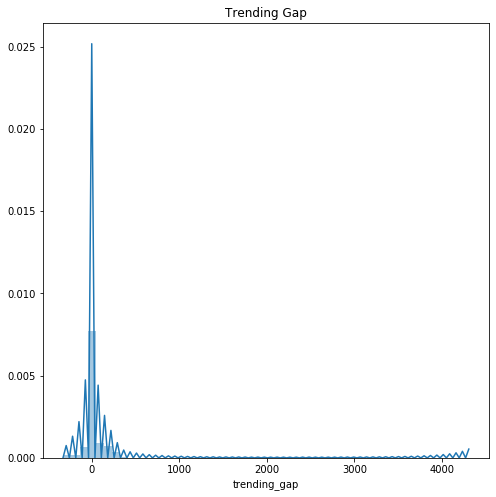

In [16]:
#Create a new column called Trending Gap which is a days difference between the Trending Date and the Publishing Time
plt.figure(figsize = (8,8))
sns.distplot(youtube['trending_gap'])
plt.title('Trending Gap')

Text(0.5, 1.0, 'Title Total Word')

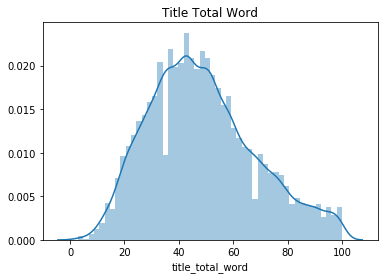

In [17]:
#jumlah karakter Title
sns.distplot(youtube['title_total_word'])
plt.title('Title Total Word')

Text(0.5, 1.0, 'Description Total Word')

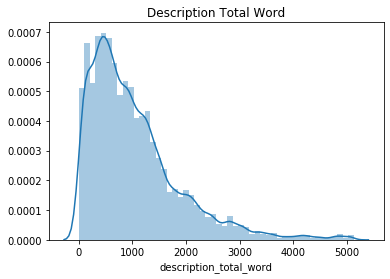

In [18]:
#jumlah karakter Description
sns.distplot(youtube['description_total_word'])
plt.title('Description Total Word')

<Figure size 576x576 with 0 Axes>

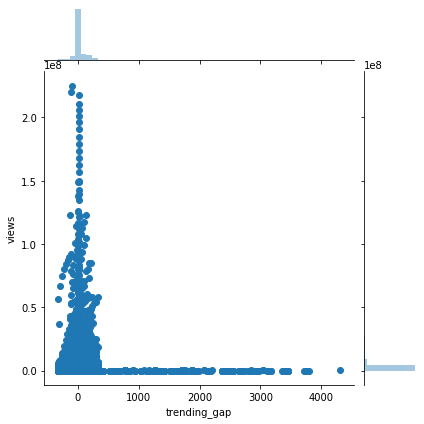

In [19]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube, x = 'trending_gap', y = 'views')

<Figure size 576x576 with 0 Axes>

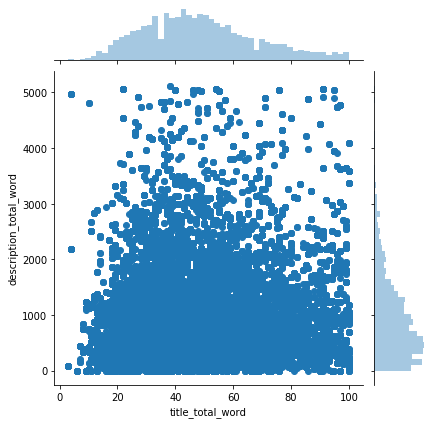

In [20]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube, x = 'title_total_word', y = 'description_total_word')

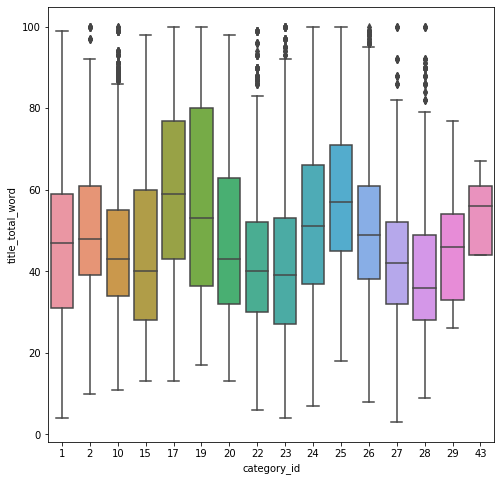

In [21]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'category_id', y = 'title_total_word', data = youtube)

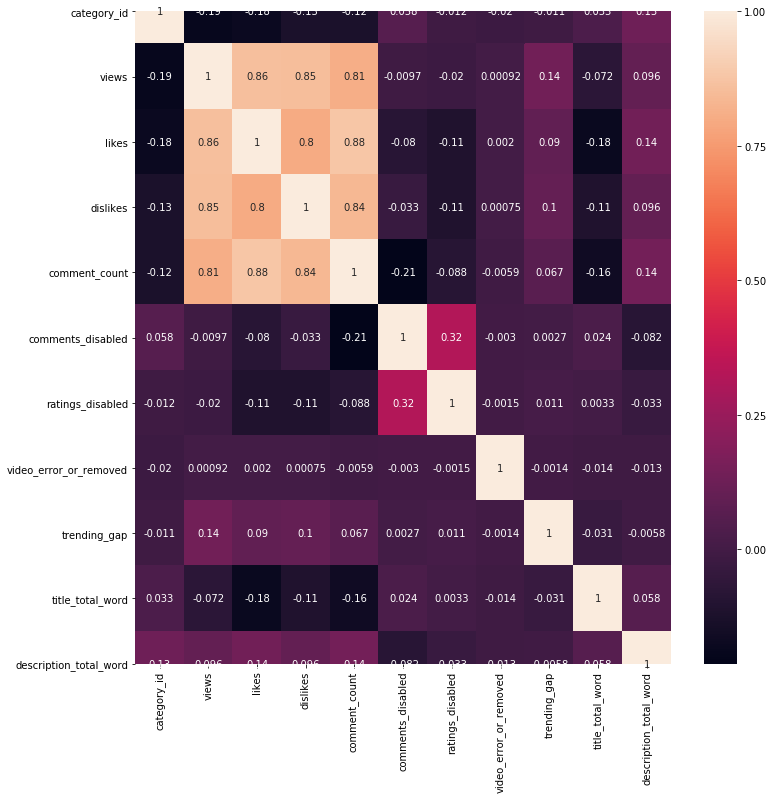

In [22]:
plt.figure(figsize = (12,12))
sns.heatmap(youtube.corr('spearman'), annot = True)

In [23]:
# I create a new column called like_delta, which basically differences of number between likes and disilikes
youtube['like_delta'] = youtube['likes'] - youtube['dislikes']

In [24]:
youtube[youtube['like_delta'] == 0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,title_total_word,description_total_word,like_delta
192,wRGldR_SQAA,2017-11-14,Apple Clips sample,Steve Kovach,22,2017-11-09,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,5,18,92,0
1435,Kn5UgGQukYQ,2017-11-21,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,403,55,2310,0
1667,Kn5UgGQukYQ,2017-11-22,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,404,55,2310,0
1868,_akwfRuL4os,2017-11-23,Highlights of the EA predatory behavior announ...,chris lee,22,2017-11-21,[none],160012,0,0,1722,https://i.ytimg.com/vi/_akwfRuL4os/default.jpg,False,True,False,The State of Hawaii announces action to addres...,2,52,122,0
1914,Kn5UgGQukYQ,2017-11-23,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",36137,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,405,55,2310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28135,UwbO_xb1-Xo,2018-05-04,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,2018-03-21,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1040664,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",44,58,79,0
28346,UwbO_xb1-Xo,2018-06-04,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,2018-03-21,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1045731,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",75,58,79,0
28550,9TUBf6l7FBg,2018-04-14,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05,[none],3598220,0,0,0,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,9,29,1258,0
28751,9TUBf6l7FBg,2018-04-15,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05,[none],11137071,0,0,2,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,10,29,1258,0


## Question

Why do you think there is a trend video that did not had no difference at all between the number of the likes and dislikes? Is there any interesting pattern from the data you could find? Show it with the data and visual if you find it interesting

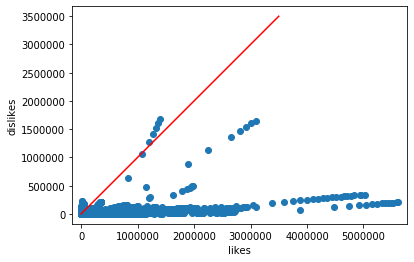

In [25]:
plt.scatter(x='likes', y='dislikes', data=youtube)
plt.xlabel('likes')
plt.ylabel('dislikes')
plt.axis('equal')
plt.plot([0,3500000],[0,3500000],'r')

In [26]:
youtube[(youtube['dislikes']>youtube['likes']) & (youtube['dislikes']>50000)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,title_total_word,description_total_word,like_delta
6201,8d_202l55LU,2017-12-15,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,1,40,512,-105837
6410,8d_202l55LU,2017-12-16,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14,"fcc net neutrality|""breaking news video""|""vide...",1192501,5707,126649,23426,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,2,40,512,-120942
6421,8I_NkJ8VTEI,2017-12-16,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14,[none],708489,3960,54061,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",2,34,39,-50101
6621,8d_202l55LU,2017-12-17,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14,"fcc net neutrality|""breaking news video""|""vide...",1242998,5884,130836,23297,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,3,40,512,-124952
6631,8I_NkJ8VTEI,2017-12-17,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14,[none],753386,4167,57285,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",3,34,39,-53118
6856,8d_202l55LU,2017-12-18,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14,"fcc net neutrality|""breaking news video""|""vide...",1263104,5930,132439,23543,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,4,40,512,-126509
6871,8I_NkJ8VTEI,2017-12-18,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14,[none],773357,4234,58327,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",4,34,39,-54093
7109,8I_NkJ8VTEI,2017-12-19,Judge Roy Moore Campaign Statement,Roy Moore for Senate,22,2017-12-14,[none],781487,4280,58726,0,https://i.ytimg.com/vi/8I_NkJ8VTEI/default.jpg,True,False,False,"December 13, 2017 | Montgomery, Alabama",5,34,39,-54446
7116,LFhT6H6pRWg,2017-12-19,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,6,37,720,-209741
7357,LFhT6H6pRWg,2017-12-20,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13,"thedc|""dc""|""washington dc""|""washington""|""the d...",1179072,9368,224152,29063,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,7,37,720,-214784


# New

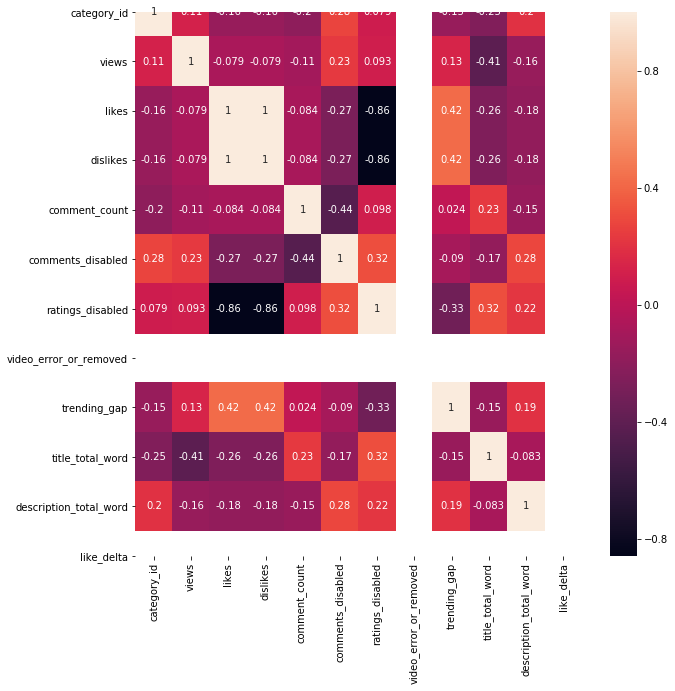

In [27]:
youtube_0_delta = youtube[youtube['like_delta']==0]
plt.figure(figsize=(10,10))
sns.heatmap(youtube_0_delta.corr(),annot=True)

In [28]:
import matplotlib
matplotlib.__version__

'3.1.1'

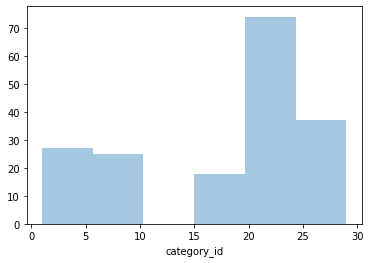

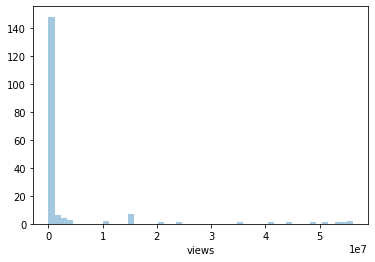

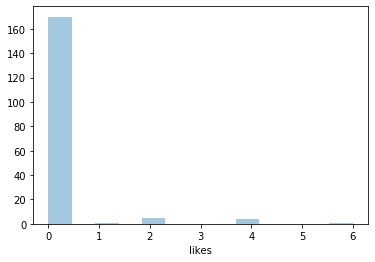

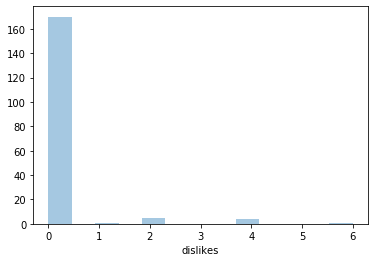

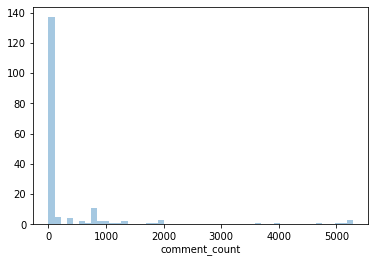

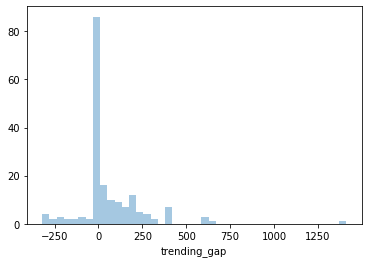

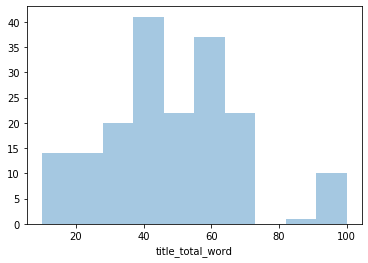

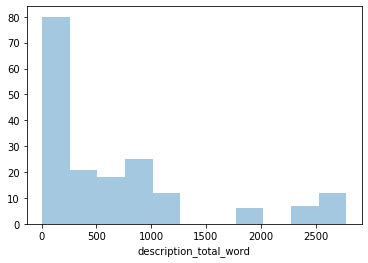

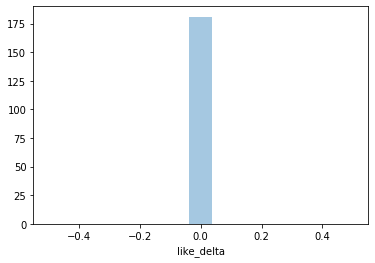

In [29]:
for i in youtube_0_delta.select_dtypes('number').columns:
    sns.distplot(youtube_0_delta[i],kde=False)
    plt.show()

In [30]:
youtube_delta=youtube[youtube['like_delta']!=0]

In [31]:
youtube['trending_gap'].describe()

count    40949.000000
mean        31.283523
std        170.113133
min       -322.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       4301.000000
Name: trending_gap, dtype: float64

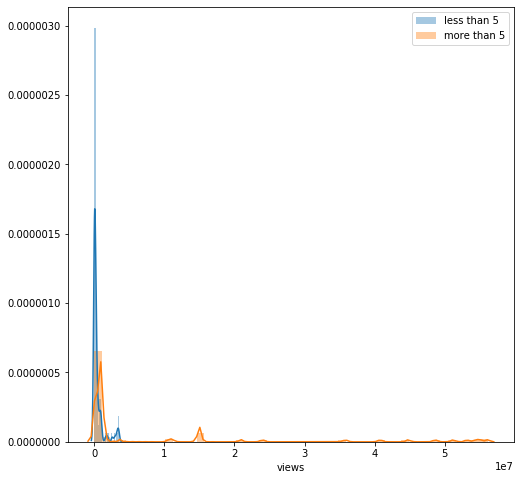

In [32]:
plt.figure(figsize=(8,8))
sns.distplot(youtube_0_delta[youtube_0_delta['trending_gap']<=6]['views'],label='less than 5')
sns.distplot(youtube_0_delta[youtube_0_delta['trending_gap']>6]['views'],label='more than 5')
plt.legend()

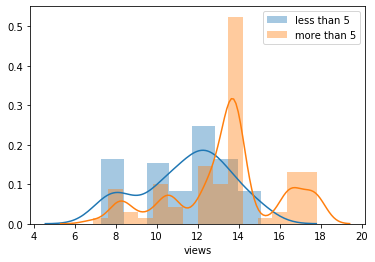

In [33]:
sns.distplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap']<=6]['views']),label='less than 5')
sns.distplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap']>6]['views']),label='more than 5')
plt.legend()
# data transformation with log to make it look normal

In [34]:
from scipy.stats import skew, kurtosis
skew(youtube_0_delta[youtube_0_delta['trending_gap']>5]['views'])
# if the skewness is between -0.5 to 0.5, data fairly simmetrical
# if the skewness is between -1 to -0.5 or 0.5 to 1, data moderately simmetrical
# else, the data are highly skewed

2.58207378995403

In [35]:
kurtosis(youtube_0_delta[youtube_0_delta['trending_gap']>5]['views'])
# if the kurtosis is close to 0, normal distribution often assumed, called mesokurtic kurtosis
# if the kurtosis is less than 0, the distribution has light tail, called platykurtic distribution
# if the kurtosis is greater than zero, the distribution has heavy tail and called leptokurtic distribution

5.468330195083588

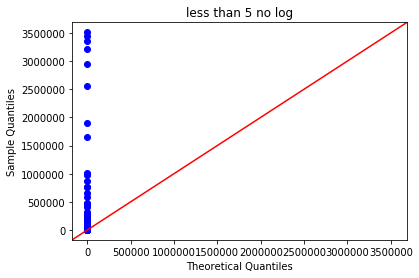

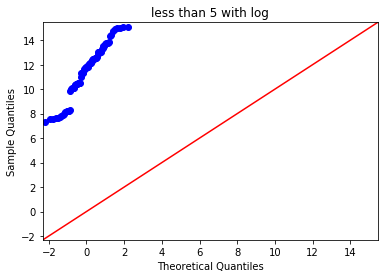

In [36]:
import statsmodels.api as sm
import pylab

sm.qqplot(youtube_0_delta[youtube_0_delta['trending_gap']<=5]['views'],line='45')
plt.title('less than 5 no log')

sm.qqplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap']<=5]['views']),line='45')
plt.title('less than 5 with log')
pylab.show()        
# using qq plot to check data normality, if the quantile folowing the red line, 
# it would be following normal distribution

In [37]:
from scipy.stats import shapiro,normaltest,anderson
def try_normal(data):
    result = {'Anderson': {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])},'Shapiro':shapiro(data)[1],
              'K^2':normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
              

In [38]:
anderson(youtube_0_delta[youtube_0_delta['trending_gap']<=5]['views'])
# Pada anderson, jika nilai stat<crit maka accept H0, normal dist/designated dist
# else, data is not normal/designated dist

AndersonResult(statistic=12.268230660126463, critical_values=array([0.549, 0.625, 0.75 , 0.875, 1.041]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [39]:
try_normal(youtube_0_delta[youtube_0_delta['trending_gap']<=5]['views'])
# goodness fit of test
# H0: Data mengikuti distribusi yg ditentukan
# H1: tidak

{'Anderson': {15.0: 0.549,
  10.0: 0.625,
  5.0: 0.75,
  2.5: 0.875,
  1.0: 1.041,
  'stat': 12.268230660126463},
 'Shapiro': 2.4342935436502677e-13,
 'K^2': 4.1708894828819576e-12}

In [40]:
shapiro(youtube_0_delta[youtube_0_delta['trending_gap']<=5]['views'])

(0.5788686275482178, 2.4342935436502677e-13)

In [41]:
try_normal(np.log(youtube_0_delta[youtube_0_delta['trending_gap']<=5]['views']))

{'Anderson': {15.0: 0.549,
  10.0: 0.625,
  5.0: 0.75,
  2.5: 0.875,
  1.0: 1.041,
  'stat': 1.1011740884549113},
 'Shapiro': 0.003916004206985235,
 'K^2': 0.08029209427923203}

In [42]:
normaltest(youtube_0_delta[youtube_0_delta['trending_gap']<=5]['views'])

NormaltestResult(statistic=52.405783595233395, pvalue=4.1708894828819576e-12)

In [49]:
#H0 : Tidak ada perbedaan view saat trending gap <= 5 dan trending gap > 5
from scipy.stats import ttest_ind
result = list(ttest_ind(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
                        youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'],))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -3.5368886849964043
P-Value: 0.0005156295981268492


In [46]:
from scipy.stats import ttest_ind
result = list(ttest_ind(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']), 
                        np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -4.719358908295347
P-Value: 4.7540335185663935e-06


In [48]:
pd.concat([youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'].reset_index(drop = True), 
           youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'].reset_index(drop =True)], axis =1).corr(
    'spearman')

,views,views
views,1.000000,0.124438
views,0.124438,1.000000


In [50]:
from scipy.stats import levene, bartlett

#Bartlett and Levene are test to see if the both sample have equal variance or not.
#Both test have H0: Equal Variance and H1: The Variance between the group is different

#We use the Bartlett test if the samples are come from the Normal Distribution and Levene test if the sample are skewed or 
#deviate from the normal distribution 

def try_equal_var(x1,x2):
    result = {'Bartlett': {'Bartlett-Stat' : bartlett(x1,x2)[0], 'P-Value': bartlett(x1,x2)[1] },
             'Levene': {'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result
try_equal_var(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
              youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])
# Lavene equal(H0)
# Bartlett H1

{'Bartlett': {'Bartlett-Stat': 313.1876287644693,
  'P-Value': 4.4140015710994365e-70},
 'Levene': {'Levene-Stat': 12.041938463505936,
  'P-Value': 0.0006518145697354723}}

In [51]:
# Non-Parametric Test jika asumsi untuk Parametric Test tidak terpenuhi
#mannwhitneyu test sebanding dengan independent t-test dalam artian melihat perbedaan satu kelompok dengan kelompok lainnya. 

from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
                        youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

#kasih batas confident, kalau 95% berarti batasnya 0.05 
#<0.05 berarti H0 ditolak(ada perbedaan), lebih dari =>0.05 H0 tidak ditolak(tidak ada perbedaan)

U-Statistic: 2267.0
P-Value: 4.3859389096169557e-07


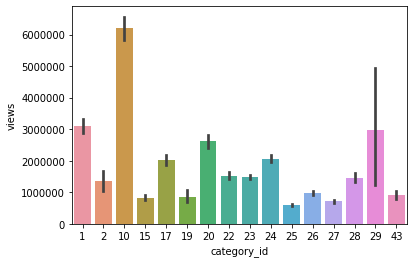

In [52]:
sns.barplot(data = youtube, x = 'category_id', y ='views')

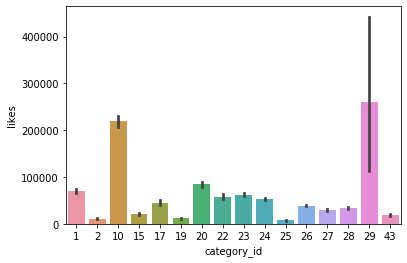

In [53]:
sns.barplot(data = youtube, x = 'category_id', y ='likes')

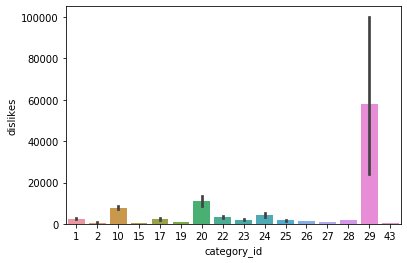

In [54]:
sns.barplot(data = youtube, x = 'category_id', y ='dislikes')